### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Import and Explore dataset

In [2]:
transactions = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= 'Transactions', index_col = [0], 
                           parse_dates= ['transaction_date'])

CustDemo = pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= 'CustomerDemographic', index_col = [0])

### Data Viewing

In [3]:
transactions.head(5)

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
transactions.describe()

,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
transactions.dtypes

product_id                          int64
customer_id                         int64
transaction_date           datetime64[ns]
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
dtype: object

In [6]:
type(transactions)

pandas.core.frame.DataFrame

### Data Selection

In [7]:
#select by columns by label
transactions['product_id']

transaction_id
1         2
2         3
3        37
4        88
5        78
         ..
19996    51
19997    41
19998    87
19999     6
20000    11
Name: product_id, Length: 20000, dtype: int64

In [8]:
#select by mulitple columns & deep copy
new_df = transactions[['product_id', 'order_status']].copy()

In [9]:
#slice rows and columns by index
transactions.iloc[0:5, 0:4]

,product_id,customer_id,transaction_date,online_order
transaction_id,,,,
1,2,2950,2017-02-25,0.0
2,3,3120,2017-05-21,1.0
3,37,402,2017-10-16,0.0
4,88,3135,2017-08-31,0.0
5,78,787,2017-10-01,1.0


### Data Cleaning

In [10]:
transactions.duplicated().sum()

0

In [11]:
transactions.isnull().sum()

product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [12]:
print(transactions.dropna().shape)
print(transactions.shape)

(19445, 12)
(20000, 12)


In [13]:
transactions_clean= transactions.dropna()

In [14]:
transactions_clean.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


## Questions to answer about the dataset

#### 1. What is the most popular product line? 
#### 4. Which month had the best revenue?

In [15]:
Product_Line= transactions_clean.product_line.value_counts()
type(Product_Line)
print(Product_Line)

Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64


#### Pie Chart to demonstrate - Rule of Thumb - no more than 5 categories

In [16]:
## Convert Pandas Series to 1D- array
x= Product_Line.values
type(x)
print(x)

[13920  3894  1213   418]


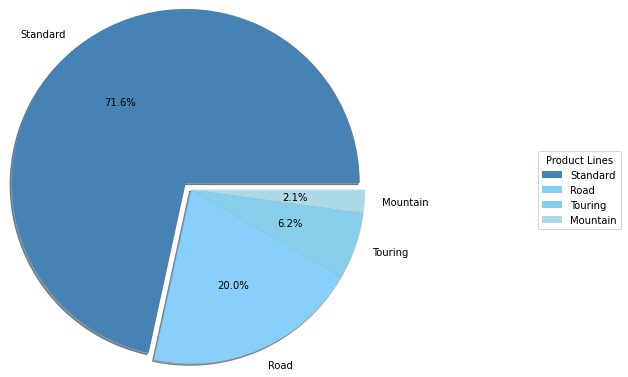

In [17]:
# Define labels

x= Product_Line.values

fig, ax = plt.subplots(figsize=(7, 4))

Labels = ['Standard', 'Road', 'Touring', 'Mountain']

#Define colors
colors = np.array(['lightpink', 'crimson', 'hotpink', 'orchid'])
colors1= np.array(['steelblue','lightskyblue','skyblue', 'lightblue'])

#number labels
explode = (0.1, 0, 0, 0)

plt.pie(x, explode= explode, labels= Labels,colors= colors1, radius= 2,
       shadow = True, autopct='%1.1f%%')

#ax.set_title("Product Lines")


#wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))

ax.legend(Labels, title="Product Lines", loc="center right",bbox_to_anchor=(1.5, 0, 1, 1))

plt.show()

#### 2. What is the percentage of online orders?

In [18]:
Online_Order= transactions.online_order.value_counts()

In [19]:
type(Online_Order)
print(Online_Order)

1.0    9829
0.0    9811
Name: online_order, dtype: int64


<BarContainer object of 2 artists>

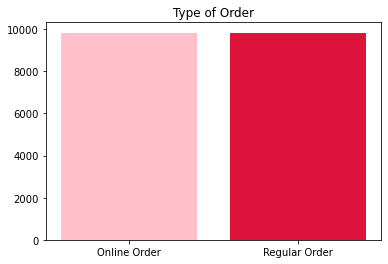

In [20]:
x1= ['Online Order', 'Regular Order']
y1 = [9829, 9811]

plt.title("Type of Order")

colors= ['pink', 'crimson']

plt.bar(x1, y1, color= colors)

#### 3. Create a profit column (list_price- standard_cost) and analyze the most profitable brand

In [21]:
transactions_clean['profit']= transactions_clean['list_price']- transactions_clean['standard_cost']

<ipython-input-21-ea6970b35c49>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['profit']= transactions_clean['list_price']- transactions_clean['standard_cost']


In [22]:
transactions_clean.head()

,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
transaction_id,,,,,,,,,,,,,
1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,17.87
2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,1702.55
3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,1544.61
4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,817.36
5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,1055.82


In [23]:
transactions_clean['profit']= transactions_clean['profit'].round(0)

<ipython-input-23-b78d7ad3213f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_clean['profit']= transactions_clean['profit'].round(0)


In [24]:
Brands_by_Profit= transactions_clean.groupby('brand').profit.sum()

In [25]:
type(Brands_by_Profit)

z= Brands_by_Profit.values
print(z)

[1541412.  853446. 1453484. 2355335. 1807209. 2717364.]


#### Analyze second sheet

In [26]:
CustDemo.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
customer_id,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [27]:
CustDemo.gender.value_counts()

Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64